# Agulhas Current

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Agulhas results </u> </center></h1>  
</div>


<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Agulhas region.</center></h5> 
</div>

## <u> Compared products </u> 

<h3>
    At 00m 
</h3> 
    <ul>   
        <li> GlobCurrent Total </li> 
        <li> WOC inertial global 0m </li>
    </ul>    
<h3>
At 15m 
</h3> 
    <ul>  
        <li> GlobCurrent Geostrophic </li> 
        <li> GlobCurrent Total </li>
        <li> WOC BFN-QG </li>
        <li> WOC inertial global 15m </li>
        <li> NeurOST </li>
        <li> OSCAR </li>
    </ul>  
 


<style>
     details > summary {
      list-style: none;
    }
    details > summary::-webkit-details-marker {
      display: none;
    }
</style>

In [1]:
from glob import glob
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore") 

In [2]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
from src import utils

In [4]:

outputdir = '../results/'


<br>

<br>


<h2><u> 1. Spectrum </u></h2>


In [5]:
dir_spectrum = '../dc_data/DC_product_evaluation/spectrum/'



<details>
    <summary><h2> ▶️ At 0m</h2></summary>


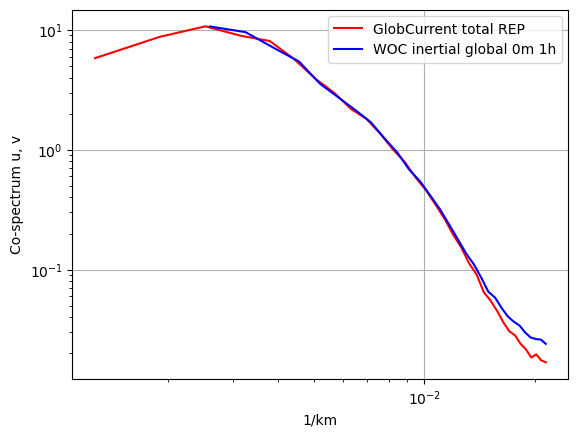

In [6]:
name_plot = 'Spectrum_Agulhas_0.png'

list_spectrum_pickles = [dir_spectrum+'spectrum_015_004_region_T1_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul0m-glob-1h_region_T1_0.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b'])

</details> 

<details>
    <summary><h2> ▶️ At 15m</h2> </summary>
 

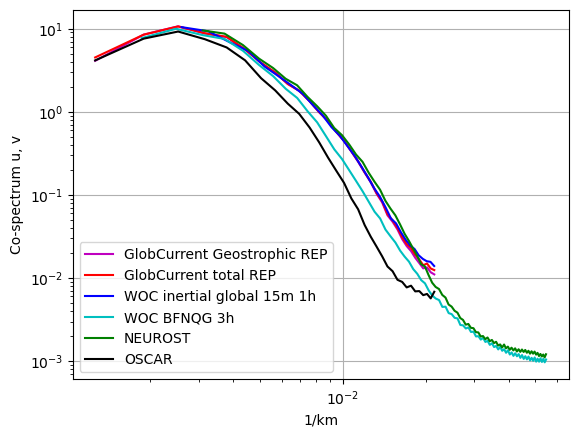

In [7]:
name_plot = 'Spectrum_Agulhas_1.png'

list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_T1_1.pyo',
                         dir_spectrum+'spectrum_015_004_region_T1_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul15m-glob-1h_region_T1_1.pyo', 
                         dir_spectrum+'spectrum_woc-l4-curgeo-bfn-3h_region_T1_1.pyo',
                         dir_spectrum+'spectrum_neurost_region_T1_1.pyo',
                         dir_spectrum+'spectrum_oscar_region_T1_1.pyo']

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['m','r','b','c','g','k'])


</details>
 

<br>

<br>

<h1><u> 2. Eulerian RMS </u></h1>



<details> 
    <summary><h2> ▶️ At 0m</h2></summary>

<br>

<h3>Norm errors</h3>
 
 

In [8]:
dir_eulerian = '../dc_data/DC_product_evaluation/eulerian_rms/'

In [9]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_RMS_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul0m-glob-1h_00/Eulerian_RMS_woc-l4-cureul0m-glob-1h.pyo','name':'WOC inertial global 00m 1h'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Correlation,Norm Explained Variance (%),Norm RMSD,Number of Points
GlobCurrent Total,36.938,0.799,68.680,0.244,37440.000
WOC inertial global 00m 1h,34.724,0.812,71.705,0.230,37440.000




<br>

<h3>Eastward errors</h3>



In [10]:
utils.DictTable(list_dict,['Eastward Quadratic Error (%)','Eastward Correlation','Eastward Explained Variance (%)','Eastward RMSD','Number of Points'])  
                           

Mean,Eastward Quadratic Error (%),Eastward Correlation,Eastward Explained Variance (%),Eastward RMSD,Number of Points
GlobCurrent Total,49.368,0.867,73.832,0.239,37440.000
WOC inertial global 00m 1h,46.755,0.881,79.632,0.227,37440.000




<br>

<h3>Northward errors</h3>



In [11]:
utils.DictTable(list_dict,['Northward Quadratic Error (%)','Northward Correlation','Northward Explained Variance (%)','Northward RMSD','Number of Points'])  
                           

Mean,Northward Quadratic Error (%),Northward Correlation,Northward Explained Variance (%),Northward RMSD,Number of Points
GlobCurrent Total,52.518,0.851,71.616,0.236,37440.000
WOC inertial global 00m 1h,50.555,0.863,75.159,0.227,37440.000



<br>

<h3>Standard deviation error</h3>



In [12]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_STD_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul0m-glob-1h_00/Eulerian_STD_woc-l4-cureul0m-glob-1h.pyo','name':'WOC inertial global 00m 1h'}]  

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrents Total,43.497,37440.000
WOC inertial global 00m 1h,43.501,37440.000



<br>

<h3>Binned plots</h3>



In [13]:

list_eulerian_pickles = [dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_BINNED_015_004.pyo',
                         dir_eulerian+'eulerian_rms_T1_woc-l4-cureul0m-glob-1h_00/Eulerian_BINNED_woc-l4-cureul0m-glob-1h.pyo']
list_names = ['GlobCurrents Total',
              'WOC inertial global 00m 1h']


<br><center><b>Results for diagnostic RMSD</b></center>

<b>GlobCurrents Total</b>

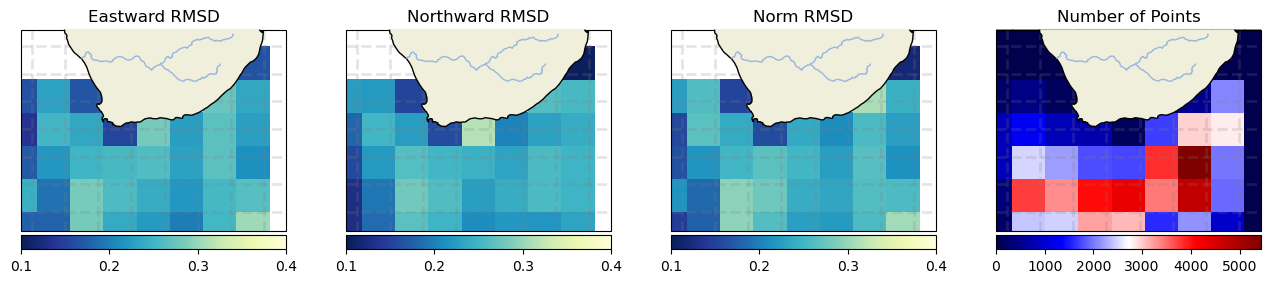

<b>WOC inertial global 00m 1h</b>

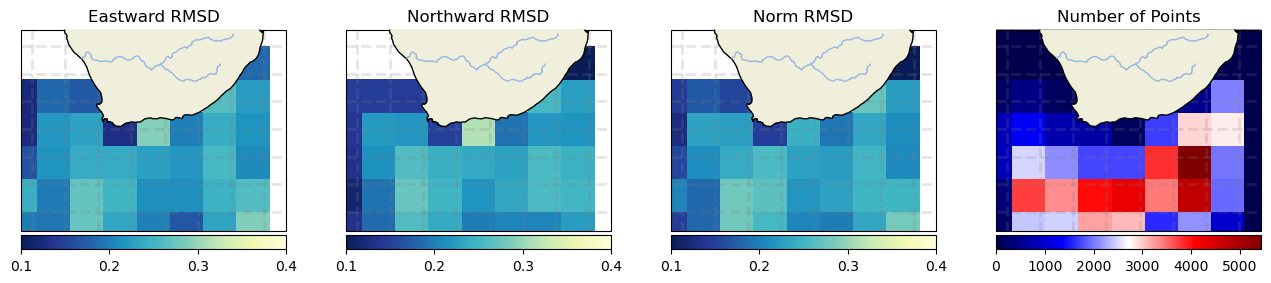


<br><center><b>Results for diagnostic Correlation</b></center>

<b>GlobCurrents Total</b>

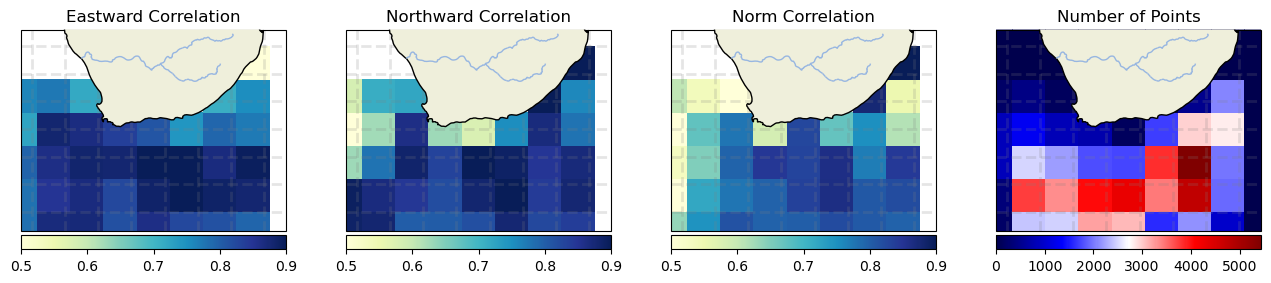

<b>WOC inertial global 00m 1h</b>

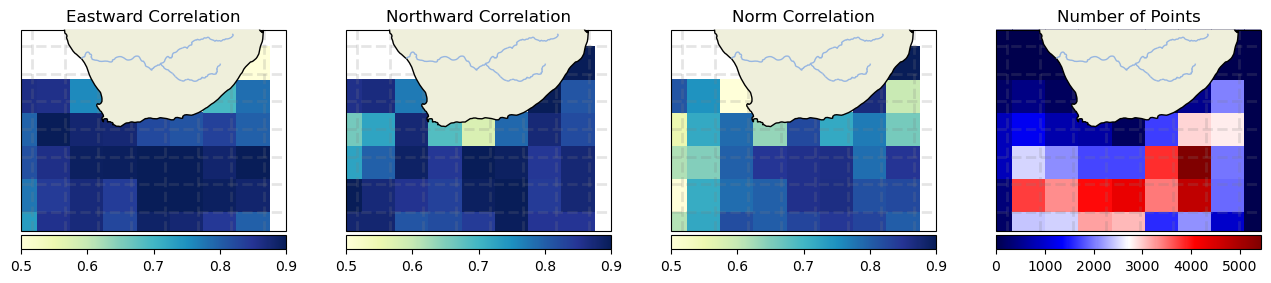


<br><center><b>Results for diagnostic Explained Variance (%)</b></center>

<b>GlobCurrents Total</b>

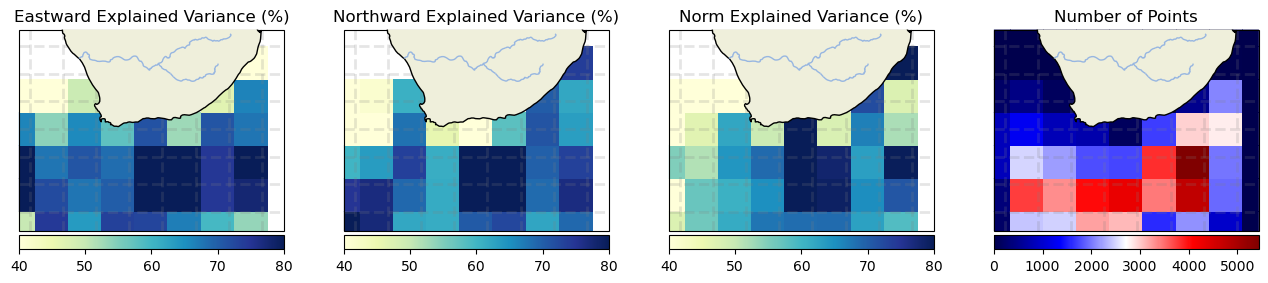

<b>WOC inertial global 00m 1h</b>

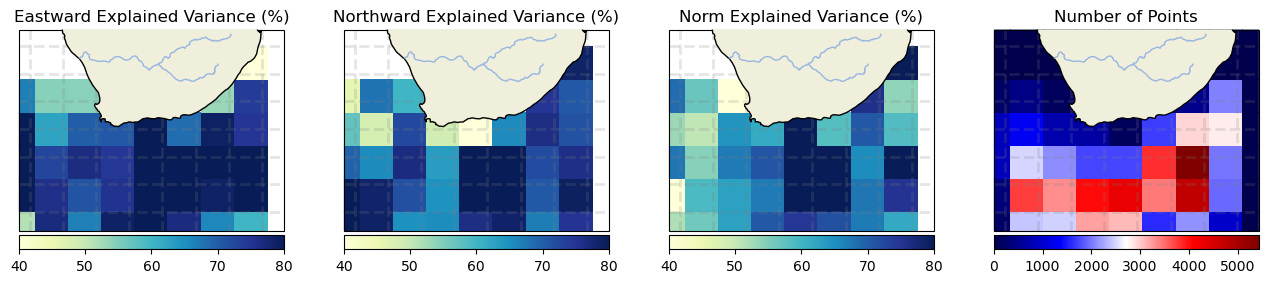


<br><center><b>Results for diagnostic Quadratic Error (%)</b></center>

<b>GlobCurrents Total</b>

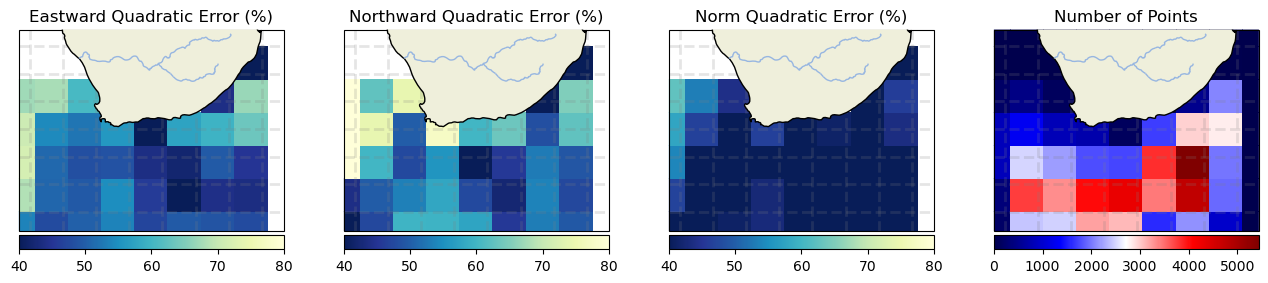

<b>WOC inertial global 00m 1h</b>

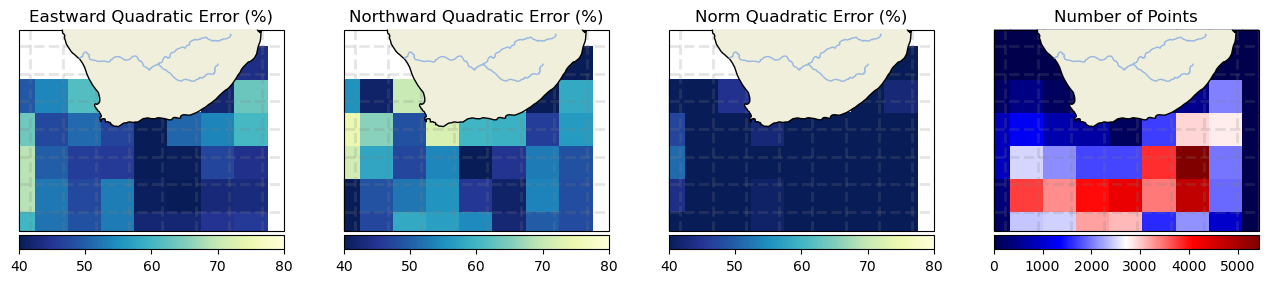

In [14]:


listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'}, 
         'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'}, 
         'Correlation': {'vmin': 0.5, 'vmax': 0.9, 'cmap': 'YlGnBu'}, 
         'Explained Variance (%)': {'vmin': 40, 'vmax': 80, 'cmap': 'YlGnBu'}, 
         'Quadratic Error (%)': {'vmin': 40, 'vmax': 80, 'cmap': 'YlGnBu_r'}

        }

proj = cartopy.crs.PlateCarree()

ind = 0

var = listvar[ind]

for var in listvar:
    print('\n')
    display(Markdown(f'\n<br><center><b>Results for diagnostic {var}</b></center>')) 

    for eulerian_pickle, name in zip(list_eulerian_pickles, list_names):  
        display(Markdown(f'<b>{name}</b>'))
        fig = eulerian.plot_bin(eulerian_pickle, outputdir, var, #box=[-5, 11, 35, 43], 
                                vmin=dic_p[var]['vmin'],
                                vmax=dic_p[var]['vmax'],
                                cmap=dic_p[var]['cmap'],
                                proj=proj) 
        plt.show()

</details> 

<details>
    <summary><h2> ▶️ At 15m</h2></summary>


<br>

<h3>Norm errors</h3>



In [15]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_008_047_15/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_15/Eulerian_RMS_015_004.pyo','name':'GlobCurrent Total'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul15m-glob-1h_15/Eulerian_RMS_woc-l4-cureul15m-glob-1h.pyo','name':'WOC inertial global 15m 1h'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_15/Eulerian_RMS_woc-l4-curgeo-bfn-3h.pyo','name':'WOC BFN-QG 3h'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_neurost_15/Eulerian_RMS_neurost.pyo','name':'NeurOST'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Correlation,Norm Explained Variance (%),Norm RMSD,Number of Points
GlobCurrent Geostrophic,37.299,0.829,69.561,0.243,44751.000
GlobCurrent Total,36.555,0.835,69.632,0.238,43190.000
WOC inertial global 15m 1h,35.879,0.835,69.976,0.233,43190.000
WOC BFN-QG 3h,36.708,0.837,69.562,0.239,43200.000
NeurOST,36.237,0.848,82.632,0.236,44738.000



<br>

<h3>Eastward errors</h3>



In [16]:
utils.DictTable(list_dict,['Eastward Quadratic Error (%)','Eastward Correlation','Eastward Explained Variance (%)','Eastward RMSD','Number of Points'])  
                           

Mean,Eastward Quadratic Error (%),Eastward Correlation,Eastward Explained Variance (%),Eastward RMSD,Number of Points
GlobCurrent Geostrophic,47.463,0.882,75.469,0.231,44751.000
GlobCurrent Total,46.562,0.886,76.783,0.226,43190.000
WOC inertial global 15m 1h,45.115,0.895,78.858,0.219,43190.000
WOC BFN-QG 3h,46.636,0.887,76.638,0.227,43200.000
NeurOST,46.866,0.888,84.905,0.228,44738.000



<br>

<h3>Northward errors</h3>



In [17]:
utils.DictTable(list_dict,['Northward Quadratic Error (%)','Northward Correlation','Northward Explained Variance (%)','Northward RMSD','Number of Points'])  
                           

Mean,Northward Quadratic Error (%),Northward Correlation,Northward Explained Variance (%),Northward RMSD,Number of Points
GlobCurrent Geostrophic,55.176,0.836,73.912,0.238,44751.000
GlobCurrent Total,54.040,0.842,75.330,0.233,43190.000
WOC inertial global 15m 1h,53.252,0.848,77.290,0.230,43190.000
WOC BFN-QG 3h,51.652,0.858,74.578,0.223,43200.000
NeurOST,51.782,0.862,81.058,0.224,44738.000



<br>

<h3>Standard deviation error</h3>



In [18]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_008_047_15/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_15/Eulerian_STD_015_004.pyo','name':'GlobCurrent Total'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_woc-l4-cureul15m-glob-1h_15/Eulerian_STD_woc-l4-cureul15m-glob-1h.pyo','name':'WOC inertial global 15m 1h'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_15/Eulerian_STD_woc-l4-curgeo-bfn-3h.pyo','name':'WOC BFN-QG 3h'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_T1_neurost_15/Eulerian_STD_neurost.pyo','name':'NeurOST'}]  

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrent Geostrophic,42.670,44751.000
GlobCurrent Total,42.329,43190.000
WOC inertial global 15m 1h,42.313,43190.000
WOC BFN-QG 3h,43.488,43200.000
NeurOST,43.268,44738.000



<br>

<h3>Binned plots</h3>



In [19]:

list_eulerian_pickles = [dir_eulerian+'eulerian_rms_T1_008_047_15/Eulerian_BINNED_008_047.pyo',
                         dir_eulerian+'eulerian_rms_T1_cmems_015_004_15/Eulerian_BINNED_015_004.pyo',
                         dir_eulerian+'eulerian_rms_T1_woc-l4-cureul15m-glob-1h_15/Eulerian_BINNED_woc-l4-cureul15m-glob-1h.pyo',
                         dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_15/Eulerian_BINNED_woc-l4-curgeo-bfn-3h.pyo',
                         dir_eulerian+'eulerian_rms_T1_neurost_15/Eulerian_BINNED_neurost.pyo']
list_names = ['GlobCurrents Geostrophic',
              'GlobCurrents Total',
              'WOC inertial global 15m 1h',
              'WOC BFN-QG 3h',
              'NeurOST']


<br><center><b>Results for diagnostic RMSD</b></center>

<b>GlobCurrents Geostrophic</b>

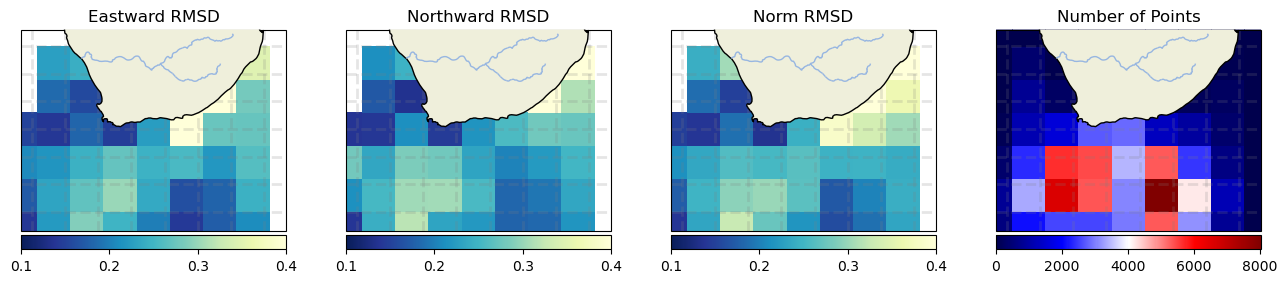

<b>GlobCurrents Total</b>

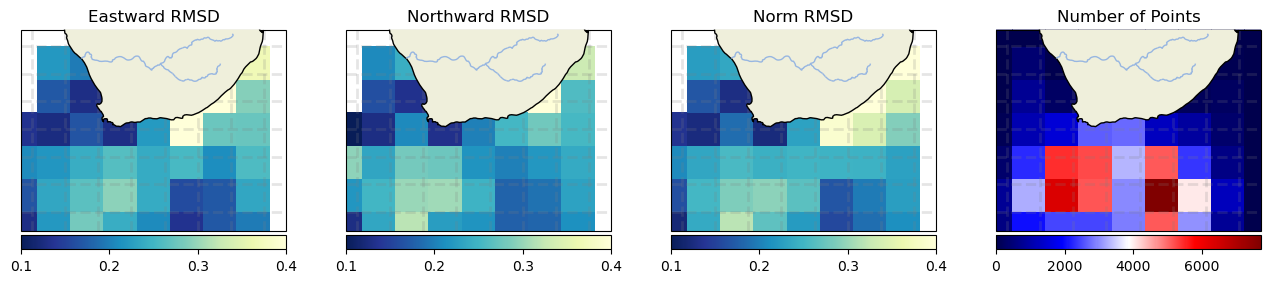

<b>WOC inertial global 15m 1h</b>

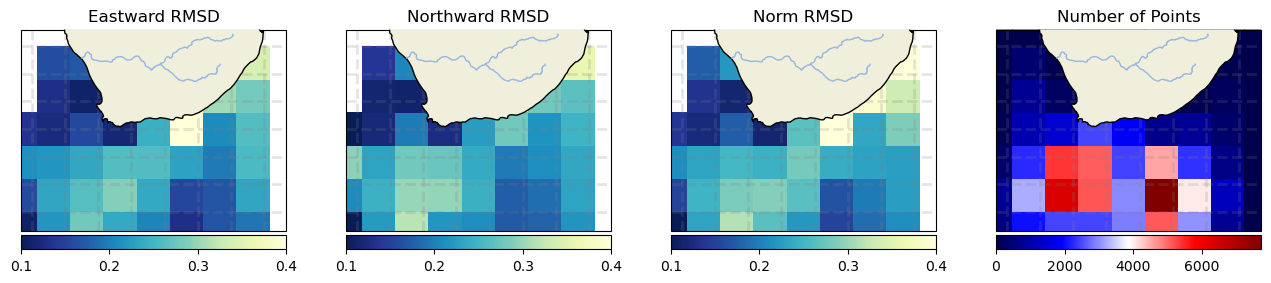

<b>WOC BFN-QG 3h</b>

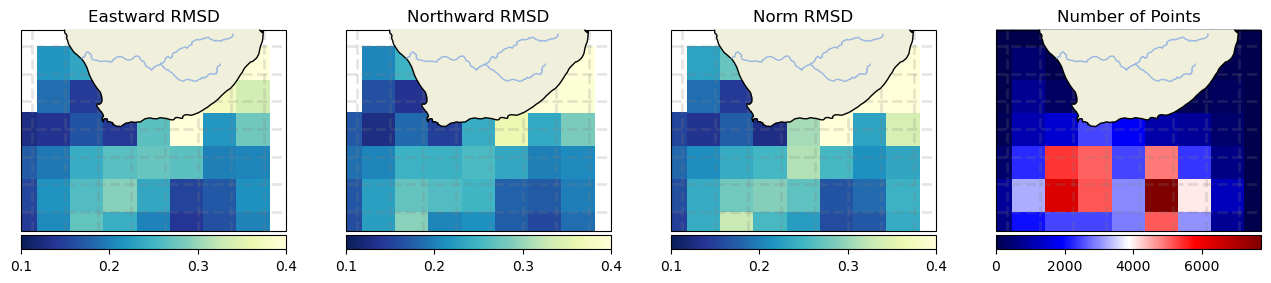

<b>NeurOST</b>

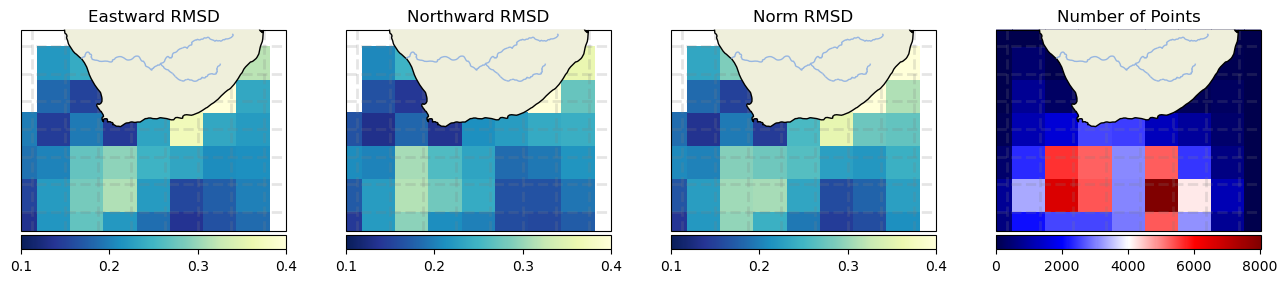


<br><center><b>Results for diagnostic Correlation</b></center>

<b>GlobCurrents Geostrophic</b>

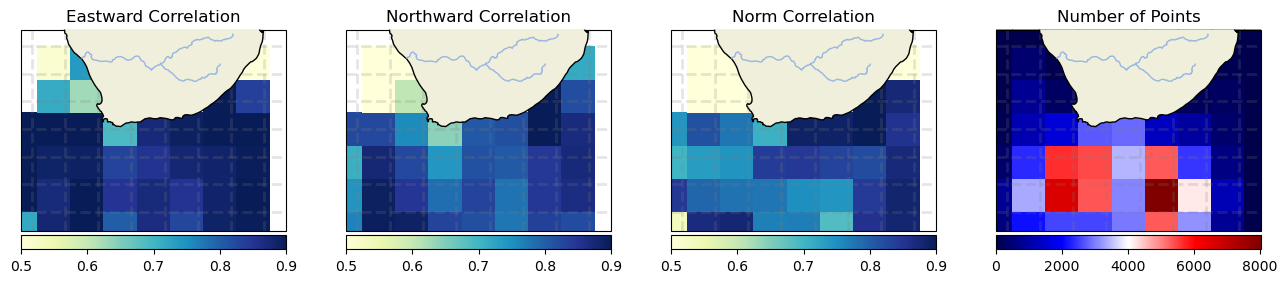

<b>GlobCurrents Total</b>

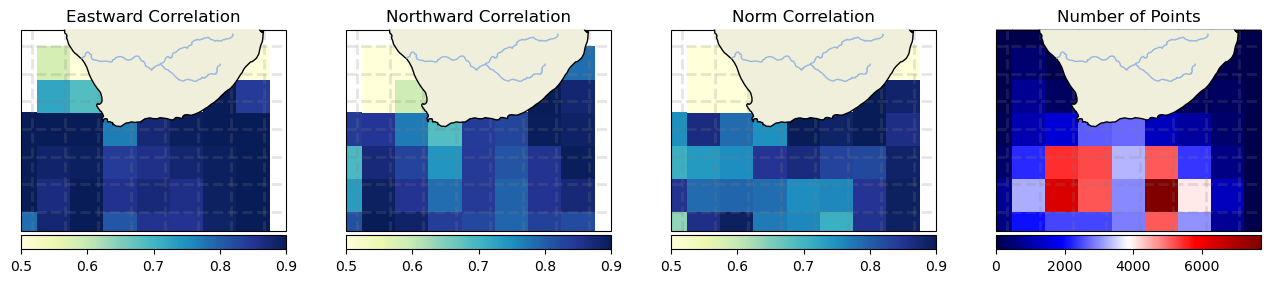

<b>WOC inertial global 15m 1h</b>

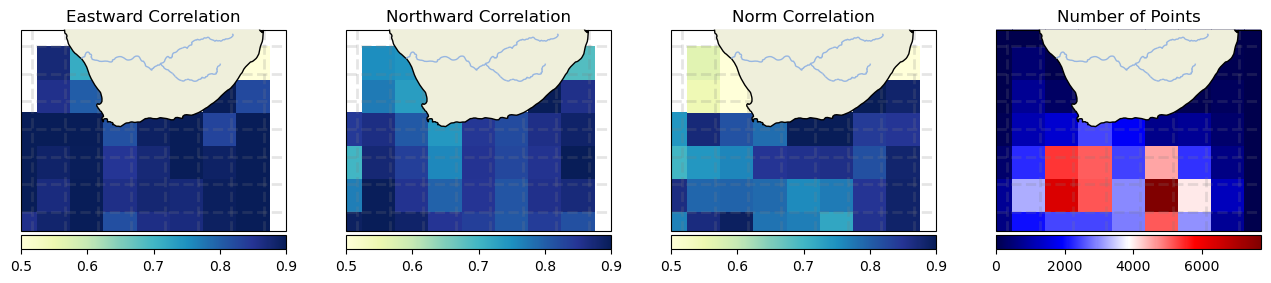

<b>WOC BFN-QG 3h</b>

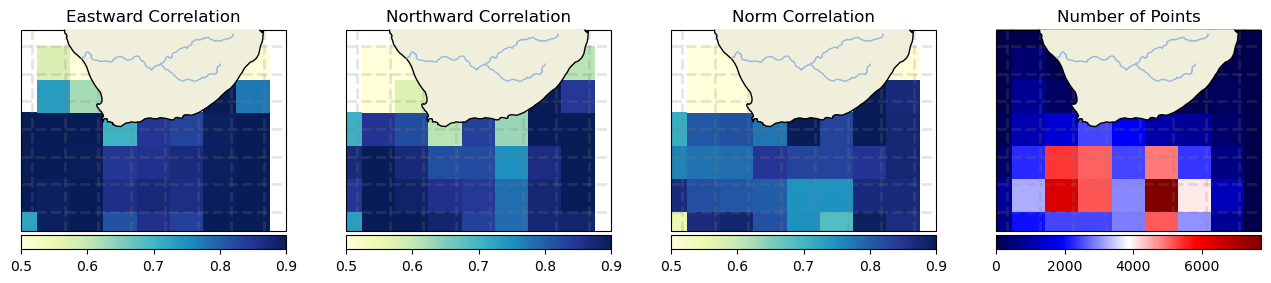

<b>NeurOST</b>

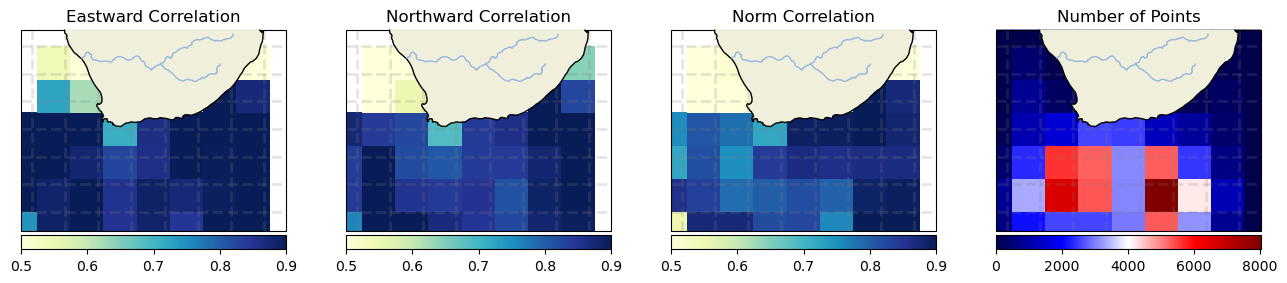


<br><center><b>Results for diagnostic Explained Variance (%)</b></center>

<b>GlobCurrents Geostrophic</b>

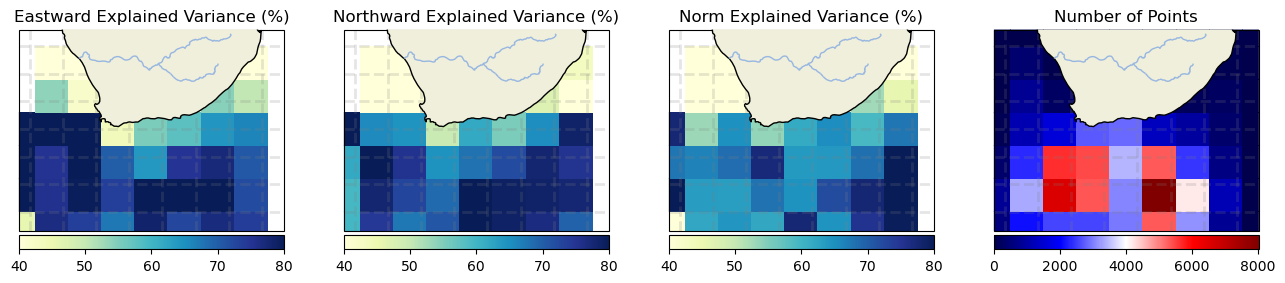

<b>GlobCurrents Total</b>

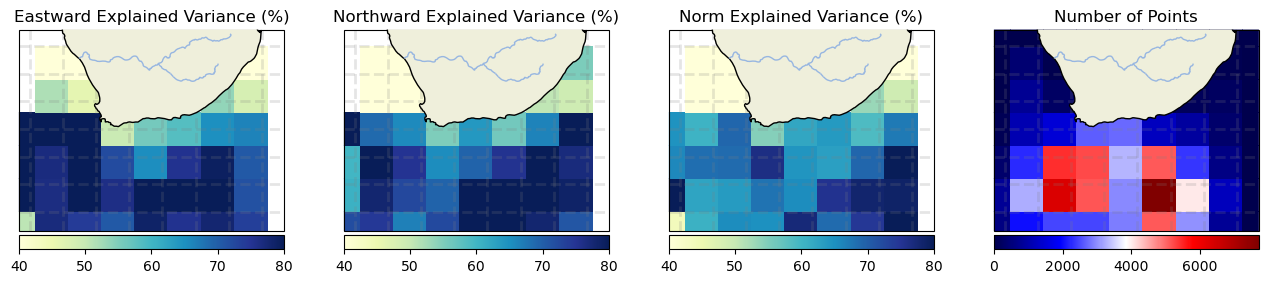

<b>WOC inertial global 15m 1h</b>

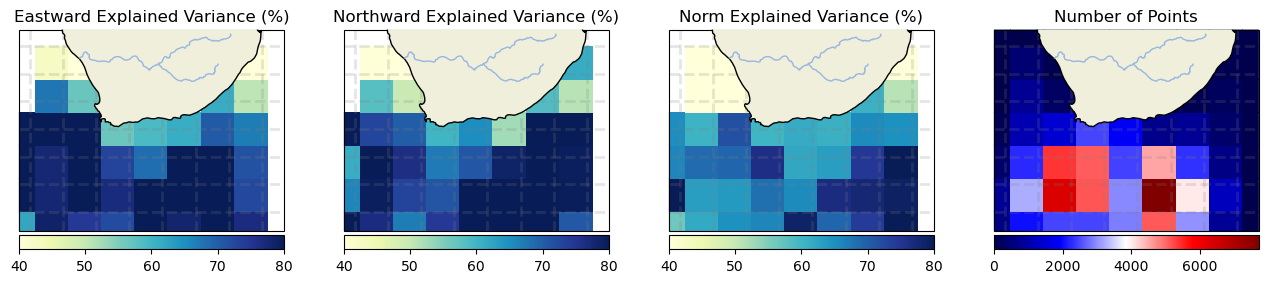

<b>WOC BFN-QG 3h</b>

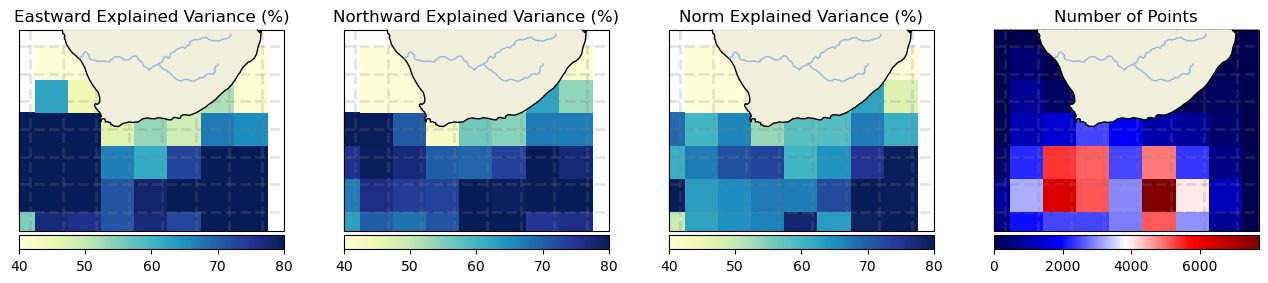

<b>NeurOST</b>

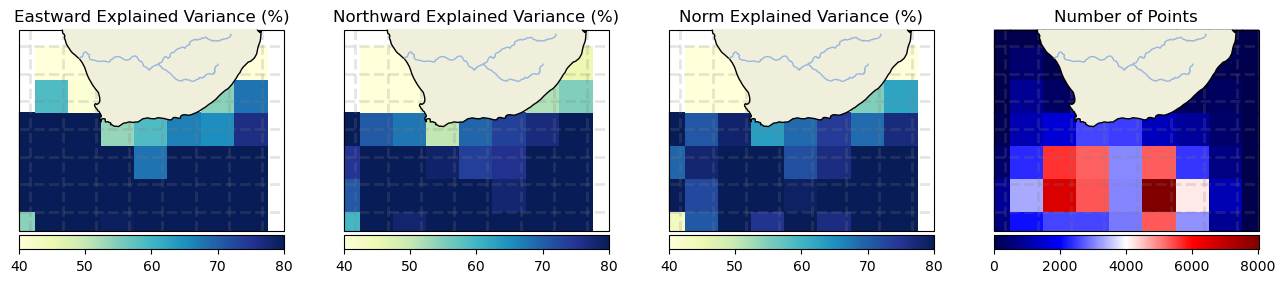


<br><center><b>Results for diagnostic Quadratic Error (%)</b></center>

<b>GlobCurrents Geostrophic</b>

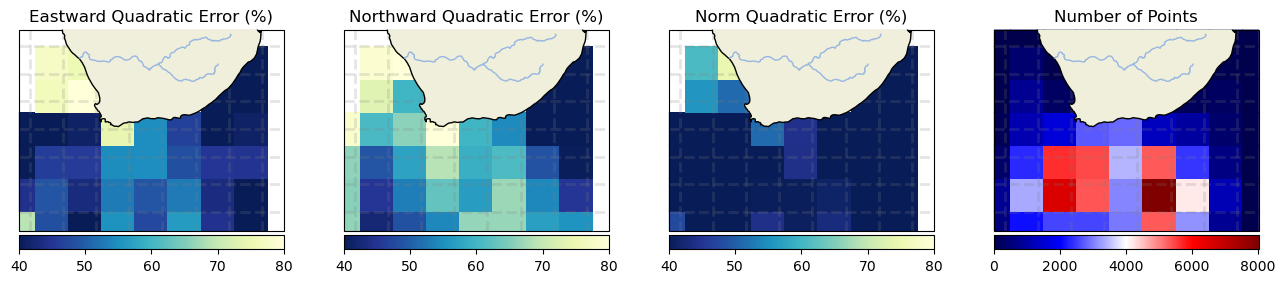

<b>GlobCurrents Total</b>

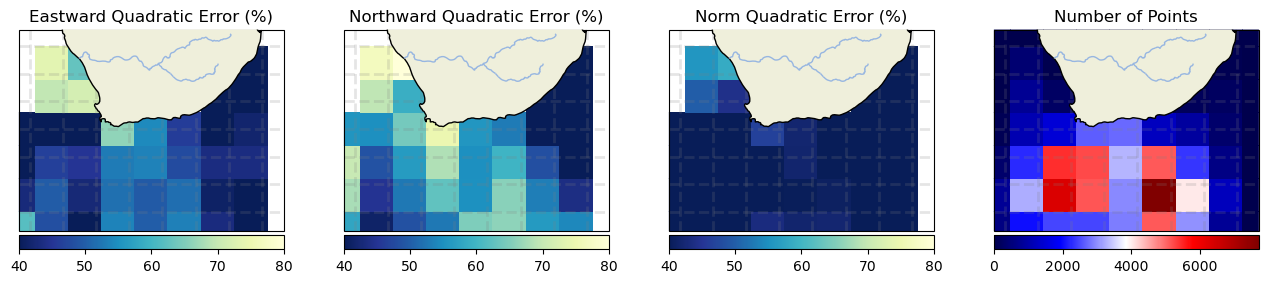

<b>WOC inertial global 15m 1h</b>

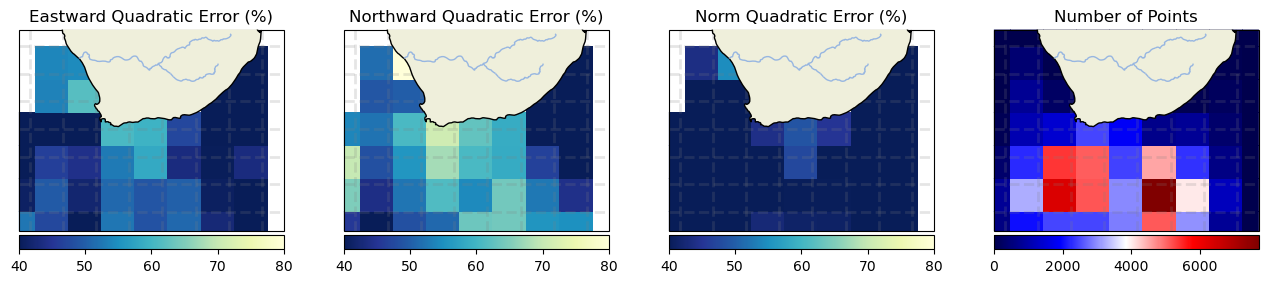

<b>WOC BFN-QG 3h</b>

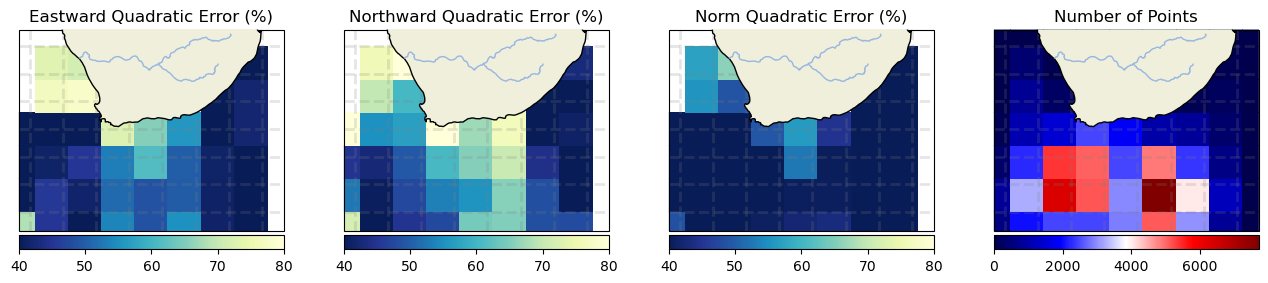

<b>NeurOST</b>

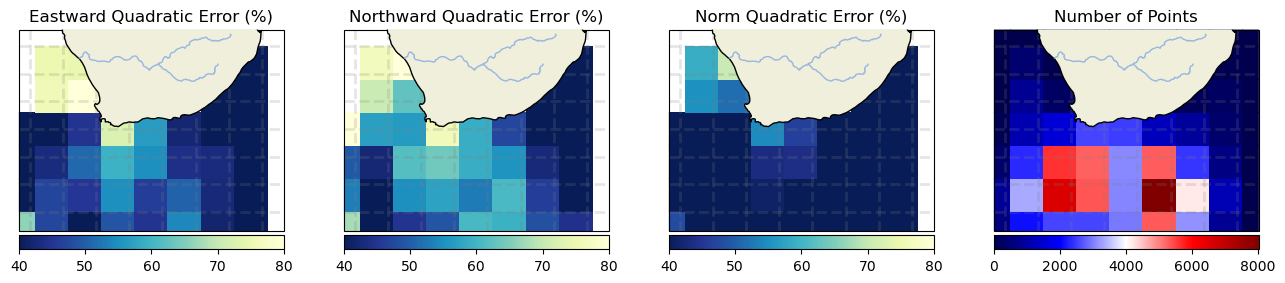

In [20]:
 

listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'}, 
         'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'}, 
         'Correlation': {'vmin': 0.5, 'vmax': 0.9, 'cmap': 'YlGnBu'}, 
         'Explained Variance (%)': {'vmin': 40, 'vmax': 80, 'cmap': 'YlGnBu'}, 
         'Quadratic Error (%)': {'vmin': 40, 'vmax': 80, 'cmap': 'YlGnBu_r'}

        }

proj = cartopy.crs.PlateCarree()

ind = 0

var = listvar[ind]

for var in listvar:
    print('\n')
    display(Markdown(f'\n<br><center><b>Results for diagnostic {var}</b></center>')) 

    for eulerian_pickle, name in zip(list_eulerian_pickles, list_names):  
        display(Markdown(f'<b>{name}</b>'))
        fig = eulerian.plot_bin(eulerian_pickle, outputdir, var, #box=[-5, 11, 35, 43], 
                                vmin=dic_p[var]['vmin'],
                                vmax=dic_p[var]['vmax'],
                                cmap=dic_p[var]['cmap'],
                                proj=proj) 
        plt.show()

</details>


<br>

<br>

<h1><u> 3. Lagrangian Cumulative Distance</u></h1>


In [21]:
dir_sde = '../dc_data/DC_product_evaluation/cumulative_distance/'


<details>
    <summary><h2> ▶️ At 0m</h2></summary>



<Figure size 640x480 with 0 Axes>

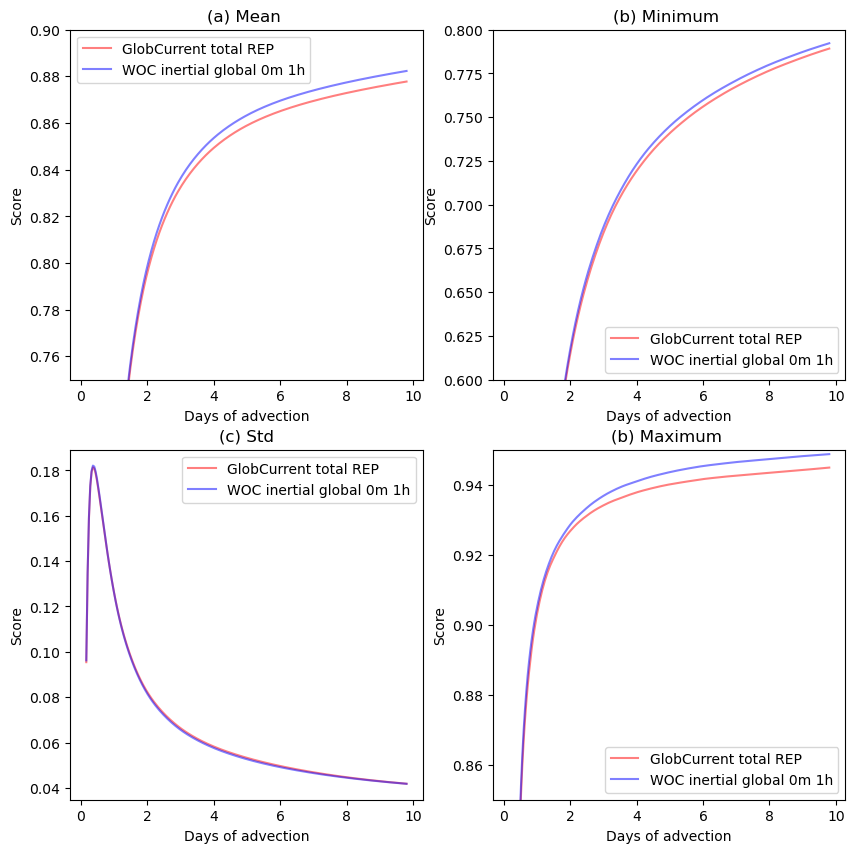

In [22]:


all_outputfilename = ['T1_cmems_015_004_00/Sde_015_004_00m.pyo.gz',
                      'T1_woc-l4-cureul0m-glob-1h_00/Sde_woc-l4-cureul0m-glob-1h_00m.pyo.gz']

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_T1_00m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b'],
             plot_range={'mean': (0.75, 0.9), 'max': (0.85, 0.95), 'min': (0.6, 0.8)})

</details>



<details>
    <summary><h2> ▶️ At 15m</h2></summary>



<Figure size 640x480 with 0 Axes>

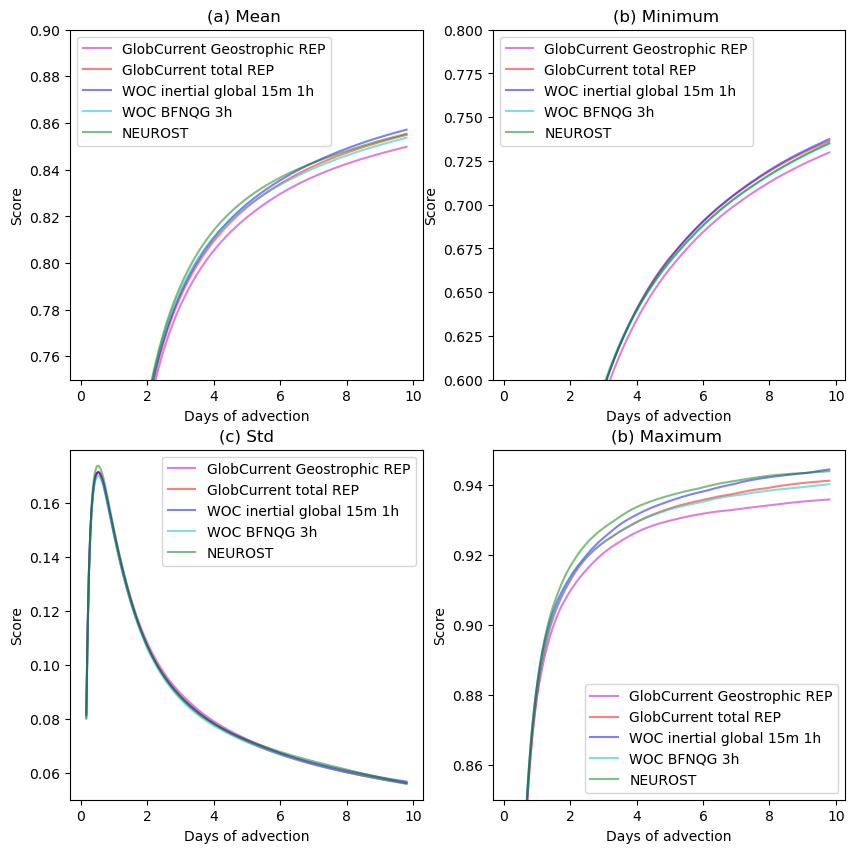

In [23]:
 

all_outputfilename = ['T1_008_047_15/Sde_008_047_15m.pyo.gz',
                      'T1_cmems_015_004_15/Sde_015_004_15m.pyo.gz', 
                      'T1_woc-l4-cureul15m-glob-1h_15/Sde_woc-l4-cureul15m-glob-1h.pyo.gz',
                      'T1_woc-l4-curgeo-bfn-3h_15/Sde_woc-l4-curgeo-bfn-3h_15m.pyo.gz',
                      'T1_neurost_15/Sde_neurost_15m.pyo.gz']

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_T1_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['m','r','b','c','g'],
             plot_range={'mean': (0.75, 0.9), 'max': (0.85, 0.95), 'min': (0.6, 0.8)})

</details> 

<br>

<br>

<h1><u>4. Fronts and currents consistency</u></h1>
 
<details>
    <summary><h2> ▶️ Maps</h2></summary>

In [24]:
dir_fronts = '../dc_data/DC_product_evaluation/fronts_vel/'

In [25]:
# Do not forget to adapt the config_fronts_T1.json file to include your product

dic_list = box_metrics.run(dir_fronts+'config_T1_bfn-3h_cmems-008_047_cmems-015_004_cmems-015_004surf_inertial-global-1h.json', 2, 
                first_date='20190101T000000Z',
                last_date ='20191215T000000Z',
                output_dir=outputdir, 
                plot=False)

(<Figure size 3000x1500 with 36 Axes>,
 <Figure size 3000x3000 with 60 Axes>,
 <Figure size 600x500 with 2 Axes>)

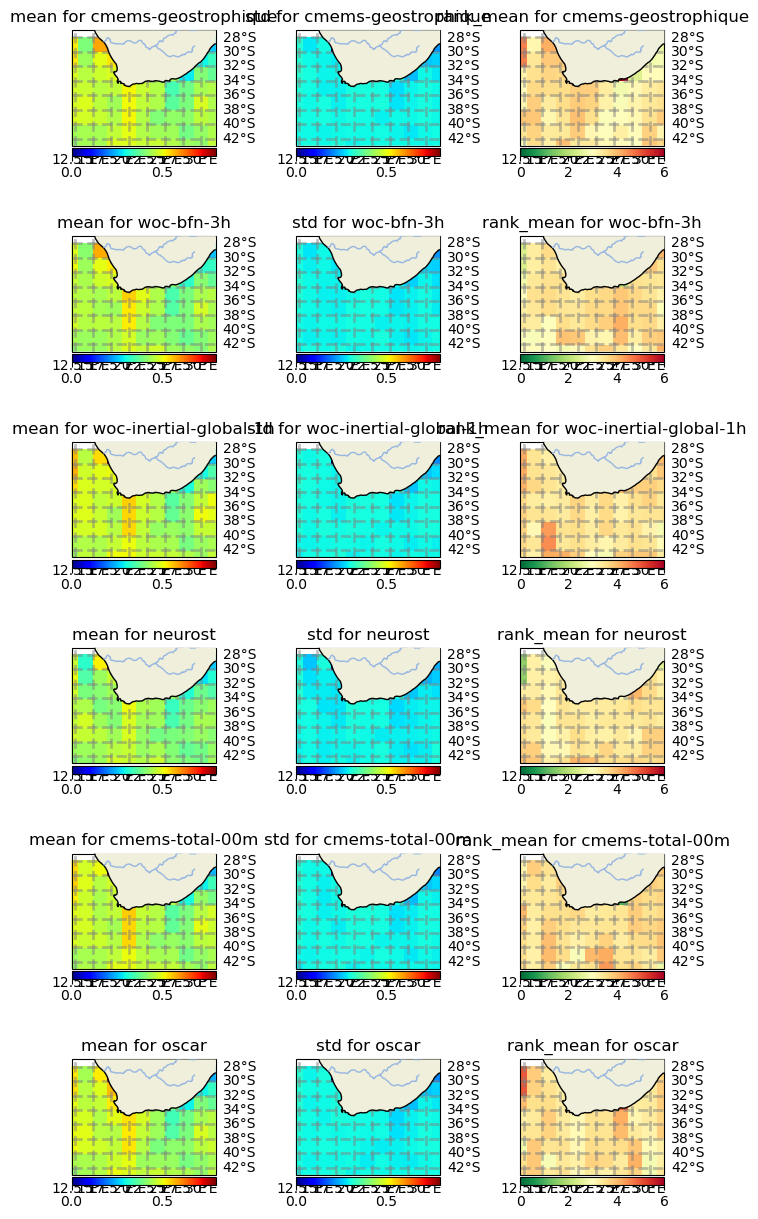

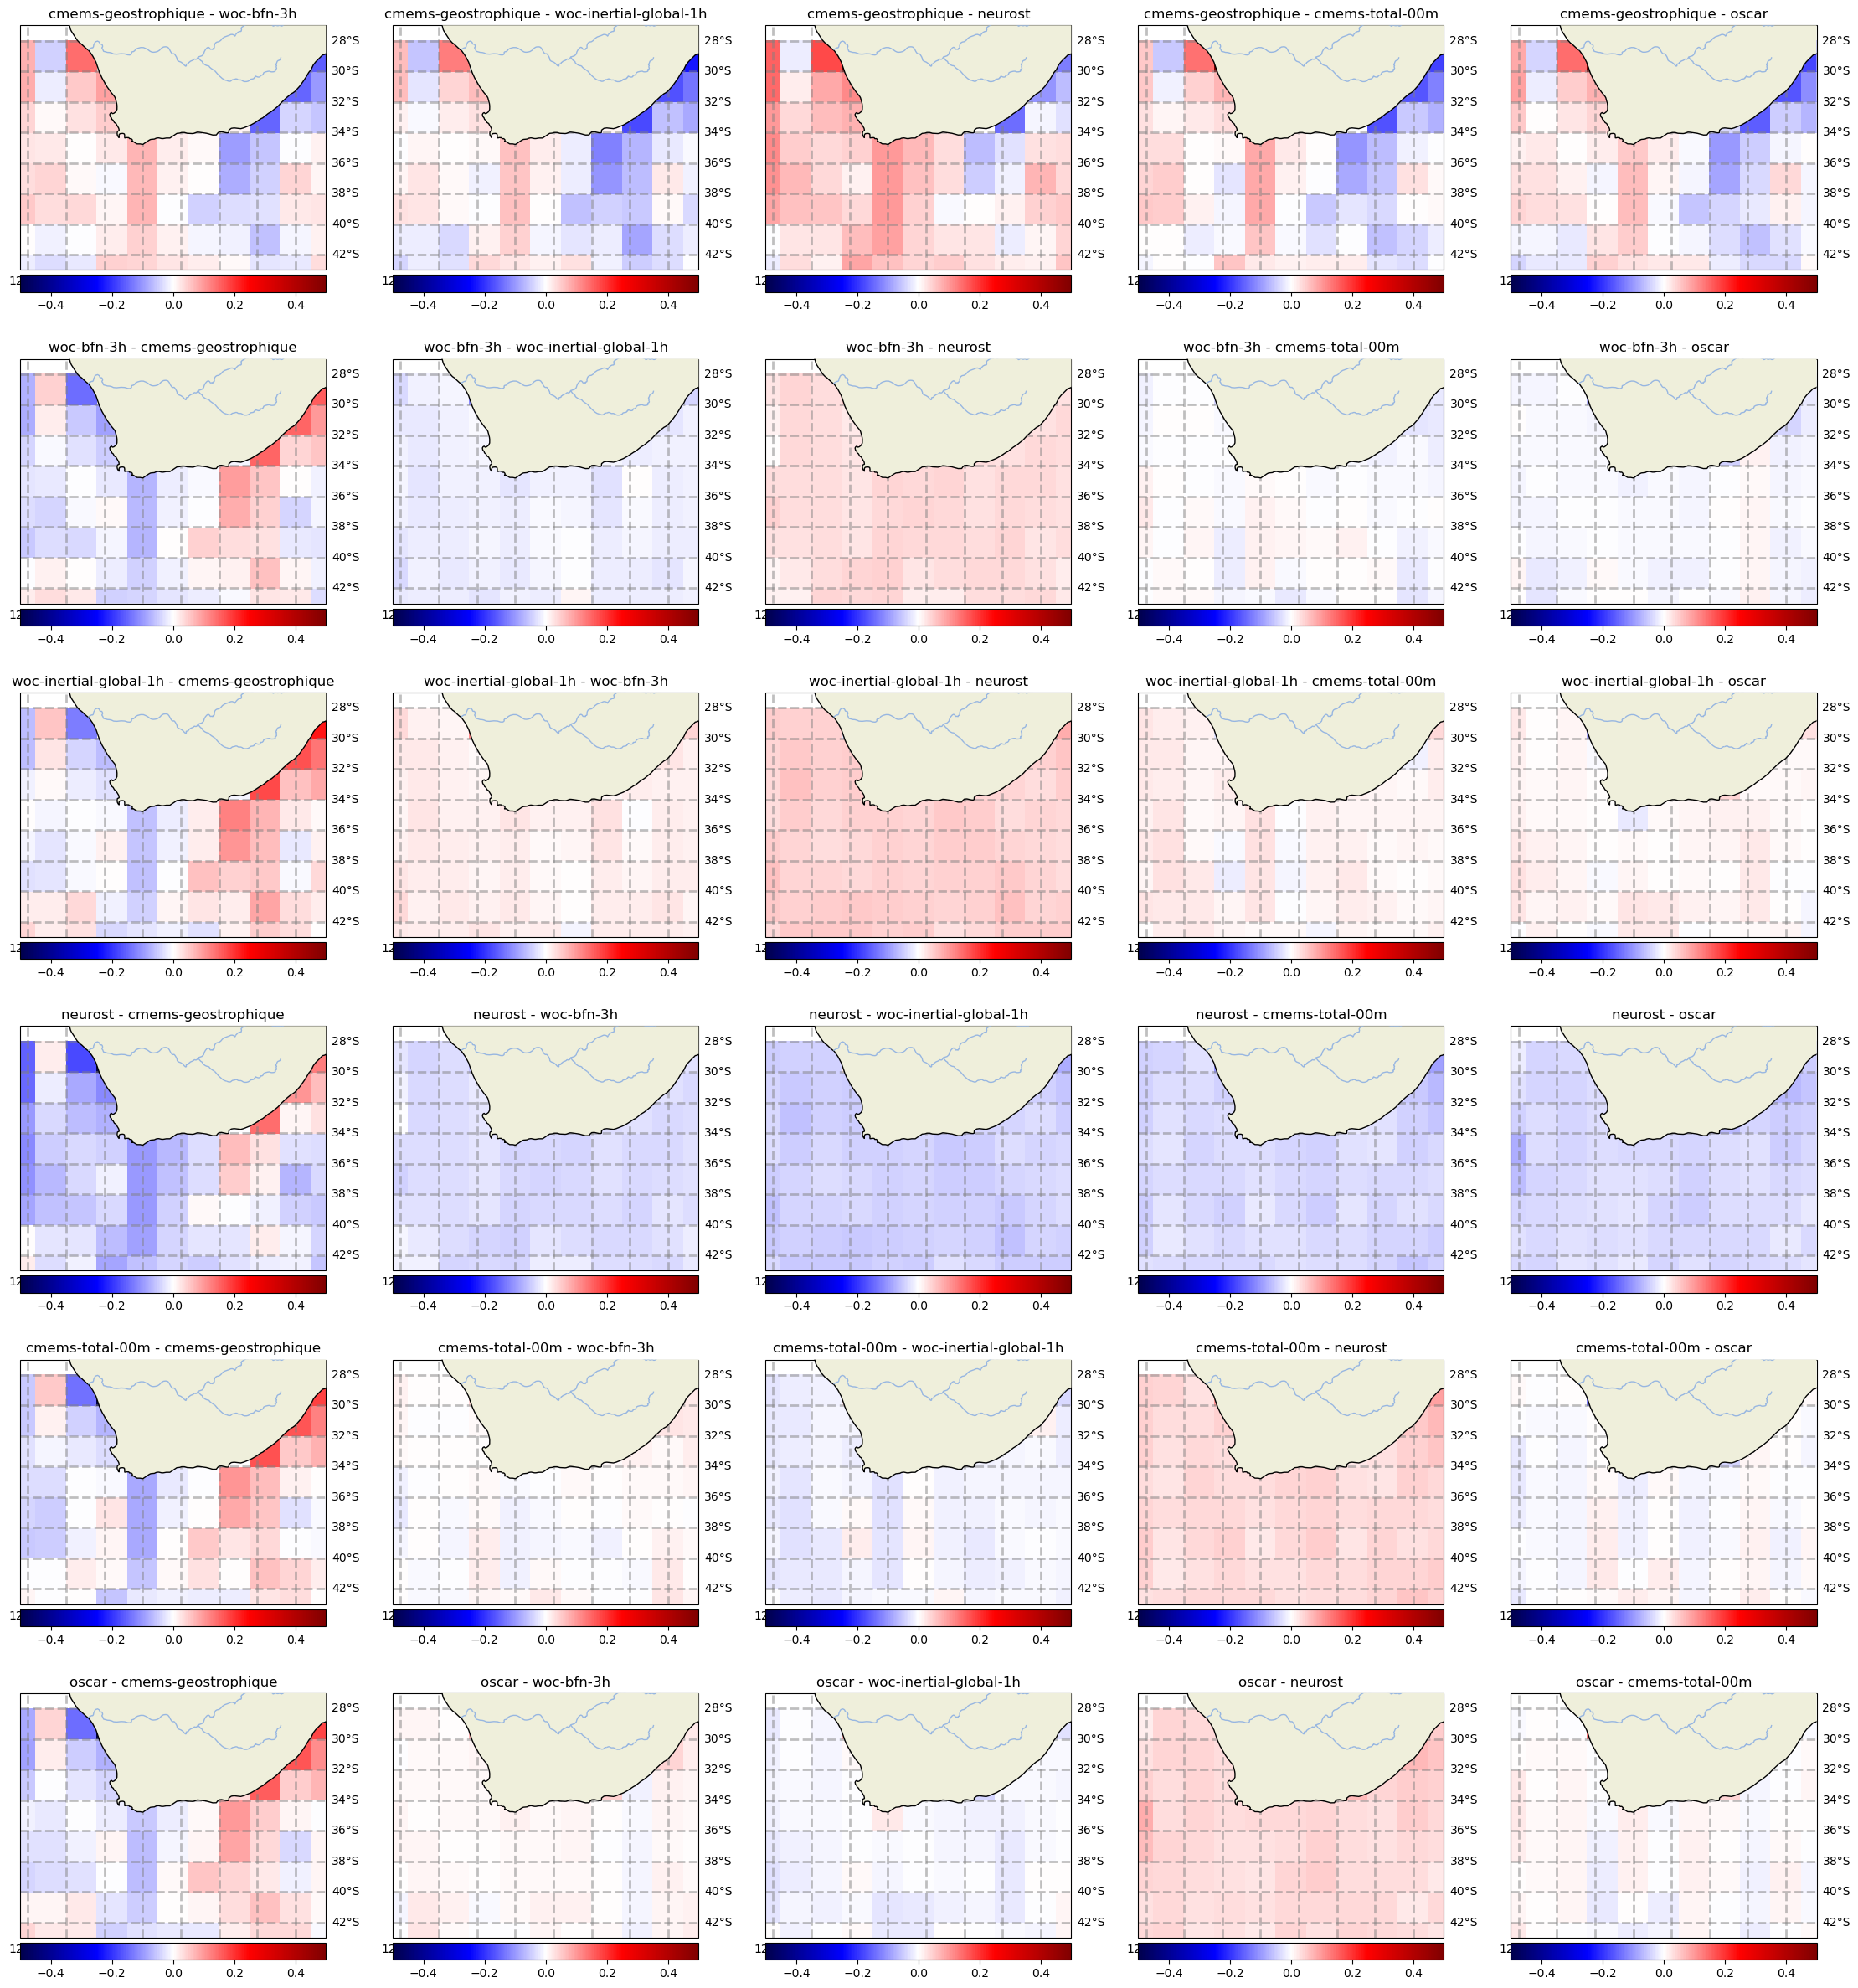

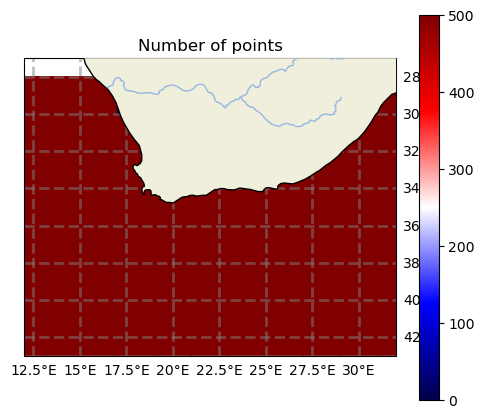

In [26]:
# Do not forget to adapt the config_fronts_T1.json file to include your product

path = outputdir + '008_047_bfn_inertial_015_004_015_004surf_2019-01-01T00:00:00.000000Z_2019-12-15T00:00:00.000000Z_mean.nc'

proj = cartopy.crs.PlateCarree()

box_metrics.run_plot(path, 
                     dir_fronts+'config_T1_bfn-3h_cmems-008_047_cmems-015_004_cmems-015_004surf_inertial-global-1h.json',
                     size=5,
                     dir_out=outputdir, 
                     proj=proj)

</details>

</br>

</br>

In [27]:
# Save results as a markdown file

! jupyter nbconvert --output-dir='../results'  nb_wocproducts_Agulhas.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt


[NbConvertApp] Converting notebook nb_wocproducts_Agulhas.ipynb to markdown
[NbConvertApp] Support files will be in nb_wocproducts_Agulhas_files/
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agulhas_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Agul